<a href="https://colab.research.google.com/github/datagrad/1.ML/blob/main/HR_Attrition_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Import data and libraries (MODULAR)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/datagrad/DataScience-Projects/main/HR-Employee-Attrition.csv'
hr_data = pd.read_csv(url)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 2.Identify Target Variable and convert it to binary

In [4]:
hr_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [5]:
hr_data['Attrition'] = hr_data['Attrition'].map({'Yes': 1, 'No': 0})

## 3.Convert Categorical Variables using OneHotEncoder (MODULAR)

In [6]:
from sklearn.preprocessing import OneHotEncoder


# One-hot encode the categorical variables
categorical_columns = hr_data.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
categorical_data_encoded = one_hot_encoder.fit_transform(hr_data[categorical_columns])

# Create a DataFrame with the encoded variables
categorical_data_encoded_df = pd.DataFrame(categorical_data_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))


# Drop the original categorical columns and concatenate the encoded DataFrame
hr_data.drop(categorical_columns, axis=1, inplace=True)
hr_data = pd.concat([hr_data, categorical_data_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 4.X and y marking as Target and Dependent Variables

In [7]:
y = hr_data[['Attrition']]
X = hr_data.drop('Attrition', axis = 1)

## 11.Post VIF Check steps (Do Only Afte VIF check)

In [8]:
# Remodeling after VIF test by removing non significant vaiables from X
# Dropping the non-significan variables after VIF Testing
# Uncomment below this post VIF testing

# columns_to_drop = ['Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences','MonthlyIncome','JobLevel','EmployeeCount','StandardHours']

# X = X.drop(columns_to_drop, axis=1)

# X.columns

## 5.Train Test Split  (MODULAR)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 35, shuffle=True)

## 6.Scaler Transformation for dependent Variables  (MODULAR)

In [10]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## 7.Fitting the logistic Regression Model  (MODULAR)

In [11]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_scaled,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## 8.Checking the prediction of the model  (MODULAR)

In [12]:
logistic.predict(X_test_scaled)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

## 9.Confusion_Matrix and Accuracy of the model:  (MODULAR)

Confusion Matrix:
 [[244  12]
 [ 21  17]]
Accuracy: 0.8877551020408163
Precision: 0.5862068965517241
Recall: 0.4473684210526316
F1 Score: 0.5074626865671642


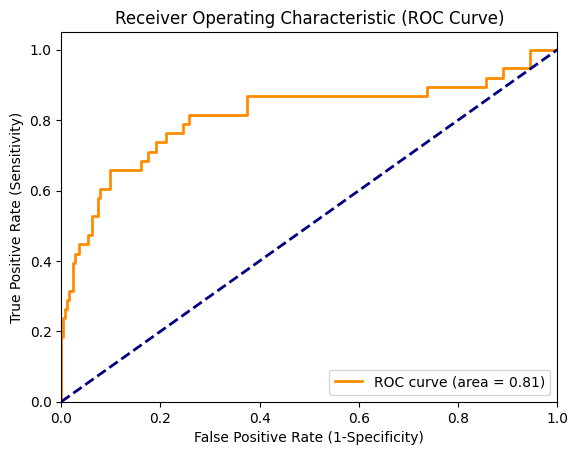

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


# Making predictions on the scaled test set
predictions = logistic.predict(X_test_scaled)
prediction_probabilities = logistic.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix : Provides a detailed breakdown of correct and incorrect classifications for each class, helping identify if the model is confusing two classes.
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy : Measures the proportion of total correct predictions — useful as an overall metric but can be misleading for imbalanced classes.
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Precision : Indicates the reliability of the model's positive predictions. High precision means low false positives — important when the cost of false positives is high.
precision = precision_score(y_test, predictions, pos_label=1)
print("Precision:", precision)

# Recall : Measures the model's ability to detect positive instances. High recall means low false negatives — crucial when it's important to capture as many positives as possible.
recall = recall_score(y_test, predictions, pos_label=1)
print("Recall:", recall)

# F1 Score : Balances precision and recall, providing a single metric to assess the model's performance when you need a balance between precision and recall.
f1 = f1_score(y_test, predictions, pos_label=1)
print("F1 Score:", f1)

# ROC Curve and AUC : The curve helps visualize the trade-off between the true positive rate and false positive rate at various thresholds.
# AUC summarizes the ROC curve into a single value, with higher values indicating better model performance, especially useful for comparing models.
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()


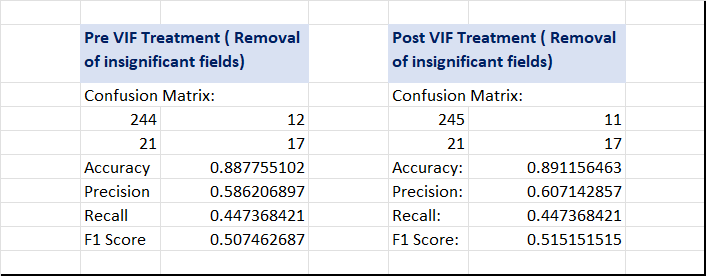

## 10.VIF

### VIF  (MODULAR)

In [14]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

### VIF variable

In [15]:
vif_cal(input_data=hr_data, dependent_col="Attrition")

Age  VIF =  2.08
DailyRate  VIF =  1.04
DistanceFromHome  VIF =  1.02
Education  VIF =  1.09
EmployeeCount  VIF =  0.0
EmployeeNumber  VIF =  1.04
EnvironmentSatisfaction  VIF =  1.03
HourlyRate  VIF =  1.03
JobInvolvement  VIF =  1.03
JobLevel  VIF =  14.16
JobSatisfaction  VIF =  1.03
MonthlyIncome  VIF = 

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


 18.15
MonthlyRate  VIF =  1.02
NumCompaniesWorked  VIF =  1.28
PercentSalaryHike  VIF =  2.56
PerformanceRating  VIF =  2.55
RelationshipSatisfaction  VIF =  1.03
StandardHours  VIF =  0.0
StockOptionLevel  VIF =  1.92
TotalWorkingYears  VIF =  5.01
TrainingTimesLastYear  VIF =  1.04
WorkLifeBalance  VIF =  1.03


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


YearsAtCompany  VIF =  4.75
YearsInCurrentRole  VIF =  2.8
YearsSinceLastPromotion  VIF =  1.72
YearsWithCurrManager  VIF =  2.85
BusinessTravel_Travel_Frequently  VIF =  2.37
BusinessTravel_Travel_Rarely  VIF =  2.38
Department_Research & Development  VIF =  44.05
Department_Sales  VIF =  43.96
EducationField_Life Sciences  VIF =  24.12
EducationField_Marketing  VIF =  10.9
EducationField_Medical  VIF =  21.67
EducationField_Other  VIF =  6.05
EducationField_Technical Degree  VIF =  8.87
Gender_Male  VIF =  1.03
JobRole_Human Resources  VIF =  7.26
JobRole_Laboratory Technician  VIF =  3.3
JobRole_Manager  VIF =  4.23
JobRole_Manufacturing Director  VIF =  1.94
JobRole_Research Director  VIF =  2.68
JobRole_Research Scientist  VIF =  3.54
JobRole_Sales Executive  VIF =  14.7
JobRole_Sales Representative  VIF =  5.6
MaritalStatus_Married  VIF =  1.86
MaritalStatus_Single  VIF =  3.05
OverTime_Yes  VIF =  1.04


In [16]:
# List of columns to drop
columns_to_drop = ['Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences','MonthlyIncome','JobLevel','EmployeeCount','StandardHours']

# Drop multiple columns in one line
vif_cal(input_data=hr_data.drop(columns_to_drop, axis=1), dependent_col="Attrition")


Age  VIF =  2.08
DailyRate  VIF =  1.04
DistanceFromHome  VIF =  1.02
Education  VIF =  1.08
EmployeeNumber  VIF =  1.03
EnvironmentSatisfaction  VIF =  1.03
HourlyRate  VIF =  1.02
JobInvolvement  VIF =  1.03
JobSatisfaction  VIF =  1.03
MonthlyRate  VIF =  1.02
NumCompaniesWorked  VIF =  1.28
PercentSalaryHike  VIF =  2.56
PerformanceRating  VIF =  2.54
RelationshipSatisfaction  VIF =  1.03
StockOptionLevel  VIF =  1.92
TotalWorkingYears  VIF =  3.96
TrainingTimesLastYear  VIF =  1.04
WorkLifeBalance  VIF =  1.03
YearsAtCompany  VIF =  4.69
YearsInCurrentRole  VIF =  2.78
YearsSinceLastPromotion  VIF =  1.7
YearsWithCurrManager  VIF =  2.83
BusinessTravel_Travel_Frequently  VIF =  2.36
BusinessTravel_Travel_Rarely  VIF =  2.37
EducationField_Marketing  VIF =  1.49
EducationField_Medical  VIF =  1.22
EducationField_Other  VIF =  1.09
EducationField_Technical Degree  VIF =  1.12
Gender_Male  VIF =  1.03
JobRole_Human Resources  VIF =  1.42
JobRole_Laboratory Technician  VIF =  2.67
Job